In [1]:
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /anaconda2/envs/spike_basicoV2/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmp25vr4bw_
  JVM stdout: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmp25vr4bw_/h2o_maravenag_started_from_python.out
  JVM stderr: /var/folders/3z/5qxln1rj4zjblz0l0hvy0n540000gn/T/tmp25vr4bw_/h2o_maravenag_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_maravenag_3wzuvj
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [2]:
data = h2o.upload_file("cereal.csv", destination_frame="train")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
data = data.drop("name") #TODO w2v of names

In [4]:
data.describe()

Rows:77
Cols:15




,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
type,enum,enum,int,int,int,int,real,real,int,int,int,int,real,real,real
mins,,,50.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
mean,,,106.8831168831169,2.545454545454545,1.0129870129870129,159.67532467532473,2.1519480519480525,14.597402597402601,6.922077922077923,96.07792207792208,28.246753246753244,2.2077922077922074,1.0296103896103896,0.8210389610389608,42.665704987012965
maxs,,,160.0,6.0,5.0,320.0,14.0,23.0,15.0,330.0,100.0,3.0,1.5,1.5,93.704912
sigma,,,19.484119056820845,1.094789748445534,1.0064725594803927,83.83229524009316,2.3833639643872226,4.278956280325907,4.4448853924193585,71.2868125092621,22.342522500566307,0.832524100135788,0.15047679973689213,0.23271613844691388,14.047288743735217
zeros,,,0,0,27,9,19,0,7,0,8,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
1,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.0,33.983679
2,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505


In [5]:
data['mfr'] = data['mfr'].asfactor()
data['type'] = data['type'].asfactor()

In [6]:
data.head()

mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.403
Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.9837
K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.4255
K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.7049
R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.3848
G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.5095
K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.1741
G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.0386
R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.1203
P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.3138


In [7]:
target = "rating"

In [8]:
train = data

In [9]:
train_cols = [x for x in train.col_names if x not in ['rating']]

In [10]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

param = {
      "ntrees" : 500
    , "max_depth" : 5
    , "learn_rate" : 0.01
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
    , "nfolds": 4
    }

model = H2OGradientBoostingEstimator(**param)
model.train(x=train_cols,y=target,training_frame=train)
model.summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1546460926971_1


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6.2228350786976225
RMSE: 2.4945610994116025
MAE: 1.2651518784560167
RMSLE: 0.04192571453871199
Mean Residual Deviance: 6.2228350786976225

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 39.20597626305361
RMSE: 6.261467580611882
MAE: 4.040082666020219
RMSLE: 0.11762409578767191
Mean Residual Deviance: 39.20597626305361
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
mae,3.9295704,0.6733386,3.2805583,5.572972,3.5054836,3.3592682
mean_residual_deviance,36.04489,20.596418,17.60915,86.40001,17.992186,22.17822
mse,36.04489,20.596418,17.60915,86.40001,17.992186,22.17822
r2,0.8256223,0.0766181,0.8823534,0.6380476,0.8909230,0.8911652
residual_deviance,36.04489,20.596418,17.60915,86.40001,17.992186,22.17822
rmse,5.6106453,1.5108854,4.196326,9.29516,4.2417197,4.709376
rmsle,0.1126838,0.0176023,0.1047854,0.1525038,0.0840496,0.1093964


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-01-02 17:29:01,1.661 sec,0.0,13.9557743,10.9426264,194.7636367
,2019-01-02 17:29:01,1.796 sec,100.0,6.8207205,4.7483717,46.5222280
,2019-01-02 17:29:01,1.930 sec,200.0,4.3331405,2.7254025,18.7761065
,2019-01-02 17:29:01,2.055 sec,300.0,3.2949960,1.9439074,10.8569984
,2019-01-02 17:29:01,2.176 sec,400.0,2.8189042,1.5236804,7.9462209
,2019-01-02 17:29:01,2.288 sec,500.0,2.4945611,1.2651519,6.2228351


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
sugars,358447.6250000,1.0,0.5316570
calories,167654.75,0.4677245,0.2486690
mfr,32043.8906250,0.0893963,0.0475282
protein,28198.1914062,0.0786675,0.0418241
potass,24467.6777344,0.0682601,0.0362910
fiber,16190.1298828,0.0451674,0.0240135
sodium,16138.3535156,0.0450229,0.0239367
carbo,12735.4404297,0.0355294,0.0188895
fat,11254.6074219,0.0313982,0.0166931
shelf,3377.1188965,0.0094215,0.0050090


<bound method ModelBase.summary of >

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model GBM_model_python_1546460926971_1 on column 'mfr'



mfr,mean_response,stddev_response,std_error_mean_response
A,43.6941270,12.7267250,1.4503449
G,41.6348644,12.9255745,1.4730059
K,43.0796921,12.6627576,1.4430552
N,45.4081634,13.2075859,1.5051441
P,43.6587576,12.1888570,1.3890492
Q,40.8973709,13.1649567,1.5002861
R,42.5279104,12.1827647,1.3883549


PartialDependence: Partial Dependence Plot of model GBM_model_python_1546460926971_1 on column 'type'



type,mean_response,stddev_response,std_error_mean_response
C,42.6866524,13.3781723,1.5245842
H,42.6866524,13.3781723,1.5245842


PartialDependence: Partial Dependence Plot of model GBM_model_python_1546460926971_1 on column 'calories'



calories,mean_response,stddev_response,std_error_mean_response
50.0,52.4474147,9.9019117,1.1284276
55.7894737,52.4474147,9.9019117,1.1284276
61.5789474,52.4474147,9.9019117,1.1284276
67.3684211,52.4474147,9.9019117,1.1284276
73.1578947,52.4474147,9.9019117,1.1284276
78.9473684,49.8570220,10.4244647,1.1879780
84.7368421,49.8570220,10.4244647,1.1879780
90.5263158,49.6749552,10.4469807,1.1905439
96.3157895,42.6639461,10.3582932,1.1804371
102.1052632,42.6639461,10.3582932,1.1804371


[, , ]

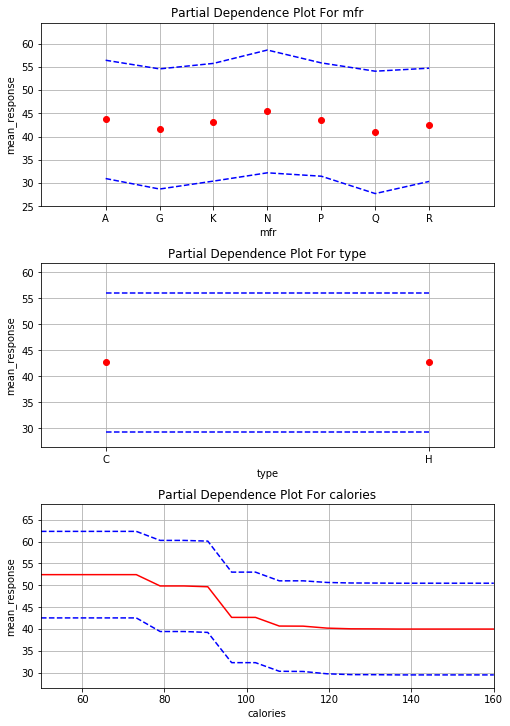

In [14]:
model.partial_plot(train, cols=train_cols[0:3], plot=True)

In [11]:
modelfile = model.download_mojo(path="models/", get_genmodel_jar=True)
print("Model saved to " + modelfile)

Model saved to /Users/maravenag/Desktop/kaggle/80-cereal/models/GBM_model_python_1545243703001_1.zip


In [ ]:
### using autoencoder for the data

In [ ]:
from h2o.estimators import H2OAutoEncoderEstimator

autoencoder = H2OAutoEncoderEstimator(activation="Tanh",
                              hidden=[25],
                              ignore_const_cols=False,
                              epochs=2000)

autoencoder.train(x=train_cols, training_frame=data)

In [ ]:
autoencoder._model_json["output"]["training_metrics"]

In [ ]:
train = data

In [ ]:
train_deep_feats = autoencoder.predict(train)
train_deep_feats = train_deep_feats.cbind(train['rating'])

deep_cols = [x for x in train_deep_feats.col_names if x not in ['rating']]

In [ ]:
from h2o.estimators import H2OXGBoostEstimator
param = {
      "ntrees" : 1000
    , "max_depth" : 5
    , "learn_rate" : 0.01
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
    , "nfolds": 4
    }

model = H2OXGBoostEstimator(**param)
model.train(x=deep_cols,y=target,training_frame=train_deep_feats)
model.summary